Can we estimate the supply curves for different types of real-estates over geographical areas?

In [13]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#read dataset
realtor= pd.read_csv("realtor-data.csv")
df=realtor.copy()

We first need to clean the data and add a new variable representing if a house has been sold before

In [15]:
#Adding a dummy variable representing if a house has been sold before
df["sold_before"]=np.where(df.prev_sold_date.isnull(),0,1)

#Removing houses not yet on the market
df.drop(df[df["status"] == "ready_to_build"].index, inplace=True)
df.drop(columns="status", inplace=True)

In [16]:
#inspect dataset
df.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,sold_before
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,0
3,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,0


In [17]:
#printing summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,1182606.0,3.393161,2.053180e+00,1.0,2.00,3.00,4.00,123.0
bath,1206853.0,2.487426,1.873599e+00,1.0,2.00,2.00,3.00,198.0
acre_lot,1043599.0,32.150131,1.249983e+03,0.0,0.12,0.32,1.34,100000.0
zip_code,1398655.0,8359.087318,4.129099e+03,601.0,5655.00,8759.00,11426.00,99999.0
house_size,949022.0,2177.853815,3.495979e+03,4.0,1168.00,1700.00,2500.00,1450112.0
price,1399097.0,818471.244103,2.684814e+06,0.0,235000.00,445000.00,795000.00,875000000.0
sold_before,1399134.0,0.510868,4.998820e-01,0.0,0.00,1.00,1.00,1.0


Text(0.5, 0, 'Price (millions USD)')

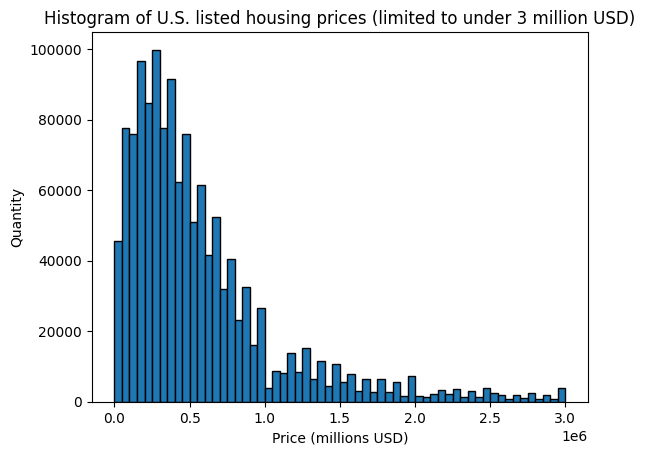

In [18]:
#plotting histagram for price variable
filtered_price = df["price"][df["price"] < 3000000]
plt.hist(filtered_price,bins=60,edgecolor='black')
plt.title("Histogram of U.S. listed housing prices (limited to under 3 million USD)")
plt.ylabel("Quantity")
plt.xlabel("Price (millions USD)")

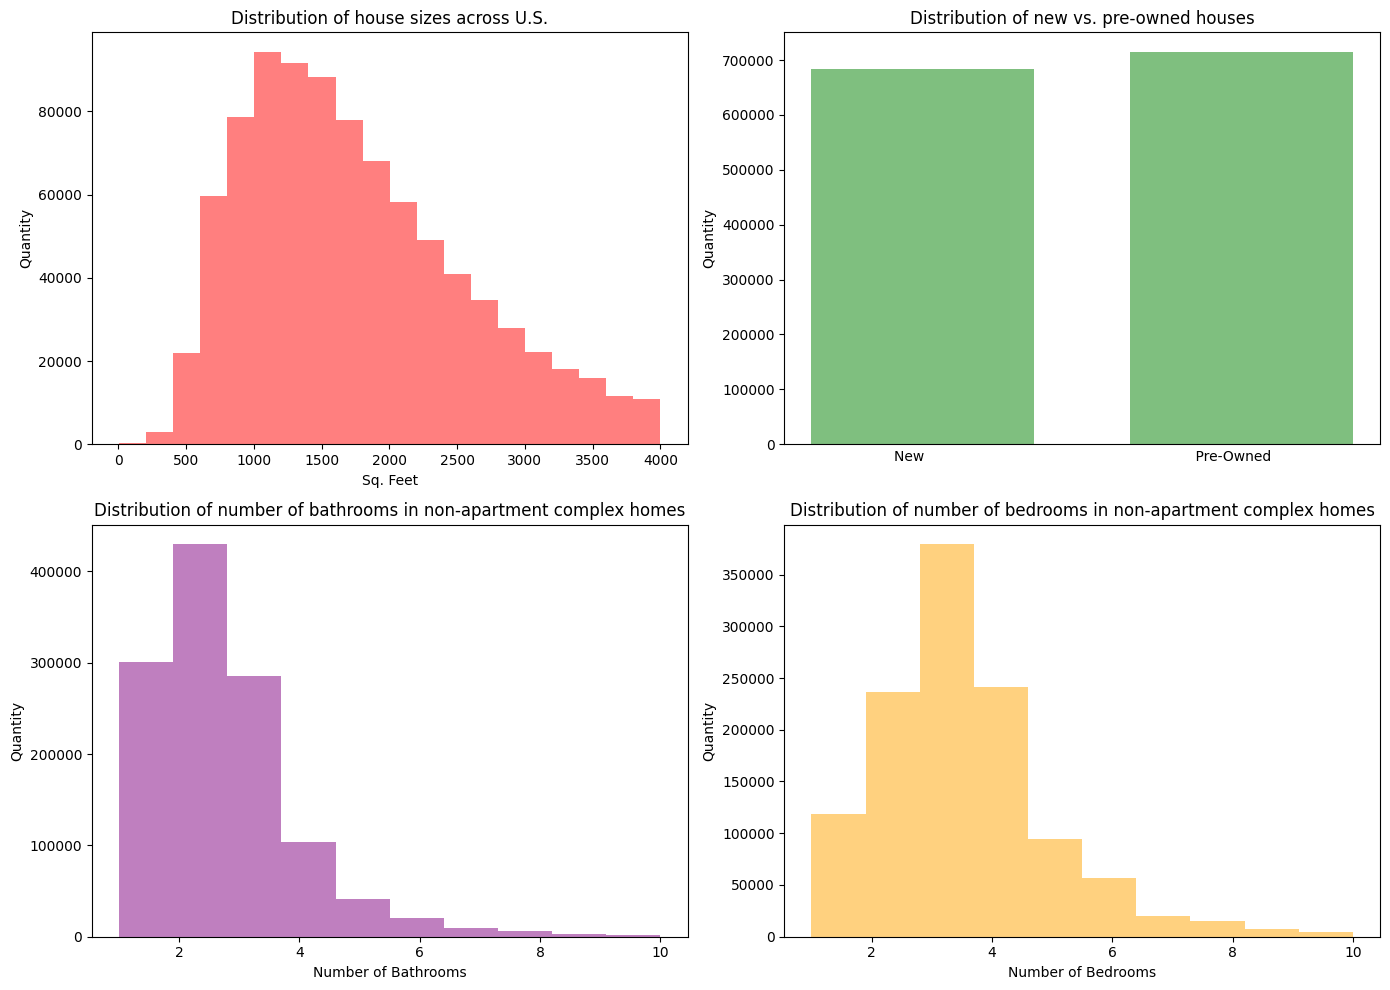

In [45]:
fig, fig_1 = plt.subplots(2,2,figsize=(14,10))

#plotting histogram for house_size
reasonable_homes = df['house_size'][df['house_size'] <= 4000]
fig_1[0,0].hist(reasonable_homes, bins=20, color="red", alpha=0.5)
fig_1[0,0].set_title("Distribution of house sizes across U.S.")
fig_1[0,0].set_xlabel('Sq. Feet')
fig_1[0,0].set_ylabel('Quantity')

#plotting histogram for sold_before 
fig_1[0,1].hist(df["sold_before"], bins=2, color="green", alpha=0.5, rwidth=0.7, align='mid')
fig_1[0,1].set_title("Distribution of new vs. pre-owned houses")
#customising x-axis for dummy
fig_1[0,1].set_xticks([])
fig_1[0,1].set_xlabel('New                                                              Pre-Owned')
fig_1[0,1].set_ylabel('Quantity')

#plotting histogram for # of baths, limited to 10 baths to restrict apartments from being on list
baths_singlefamily = df["bath"][df["bath"] <= 10]
fig_1[1,0].hist(baths_singlefamily, bins=10, color="purple", alpha=0.5)
fig_1[1,0].set_title("Distribution of number of bathrooms in non-apartment complex homes")
fig_1[1,0].set_xlabel('Number of Bathrooms')
fig_1[1,0].set_ylabel('Quantity')

#plotting histogram for # of bedrooms, limited to 10 baths to restrict apartments from being on list
beds_singlefamily = df["bed"][df["bed"] <= 10]
fig_1[1,1].hist(beds_singlefamily, bins=10, color="orange", alpha=0.5)
fig_1[1,1].set_title("Distribution of number of bedrooms in non-apartment complex homes")
fig_1[1,1].set_xlabel('Number of Bedrooms')
fig_1[1,1].set_ylabel('Quantity')

plt.tight_layout()